In [1]:
from qiskit import *
from qiskit import Aer
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
import numpy as np

In [2]:
# Random 1 qubit state to teleport
psi = random_statevector(2)
init_gate = Initialize(psi)
init_gate.label = "Init"

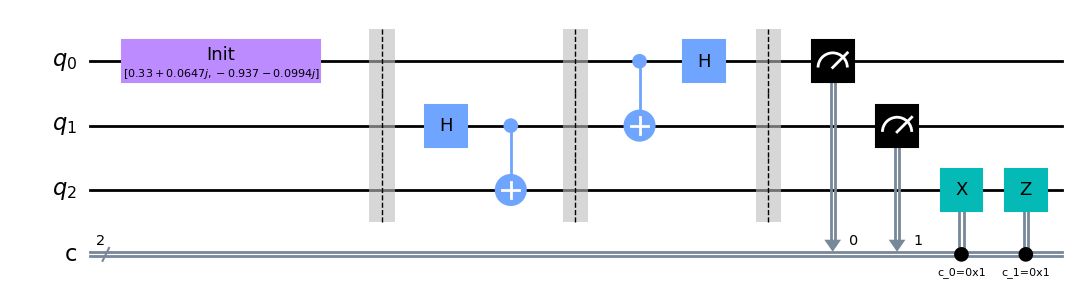

In [3]:
circuit = QuantumCircuit(3,2)
# 0 - Alice
# 1 - Shared
# 2 - Bob

# Give Alice's qubit a random state, what we want to transport
circuit.append(init_gate,[0])
circuit.barrier()

# Preprepared Bell state for Shared and Bob
circuit.h(1) # H(shared)
circuit.cnot(1,2) # CNOT(Shared,Bob)
circuit.barrier()

# Alice entangling
circuit.cnot(0,1)
circuit.h(0)
circuit.barrier()

circuit.measure([0,1],[0,1]) # measure the states

# Bob Reconstructing
circuit.x(2).c_if(0,1)
circuit.z(2).c_if(1,1)

# Measuring
circuit.draw('mpl')

<IPython.core.display.Latex object>

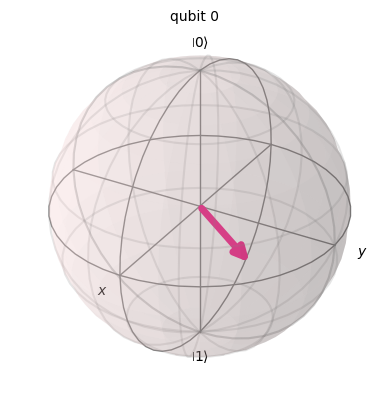

In [4]:
display(array_to_latex(psi))
plot_bloch_multivector(psi)

We see above the initial state of Alice's qubit, `qubit 0`. Below we see the states of the qubits after the teleportation circuit is run. As per no cloning theorem, we cannot copy non destructively, but we see that we have teleported the state of `qubit 0` to `qubit 2` using 2 classical bits.

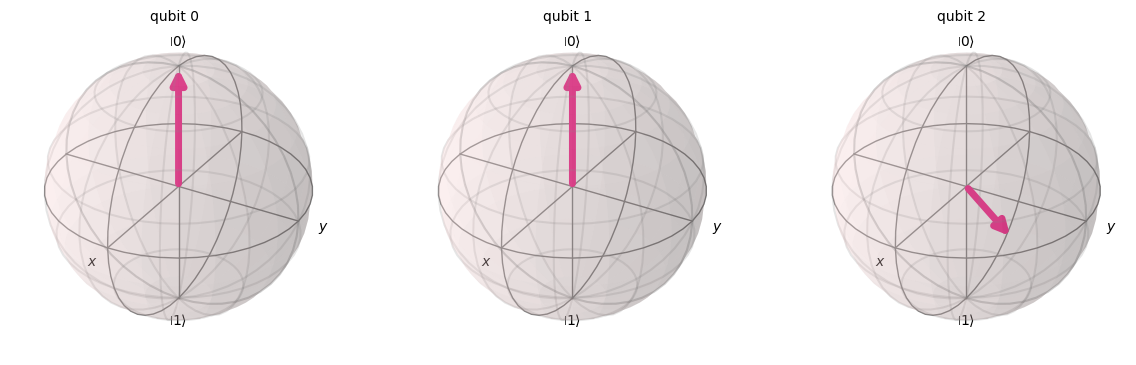

In [5]:
backend = Aer.get_backend('aer_simulator')
circuit.save_statevector()
out_vector = backend.run(circuit).result().get_statevector()
plot_bloch_multivector(out_vector)
